EECS 731: To Be or Not To Be...That is the Question.

Data modeling and classification using the Shakespeare dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data Into initial frame
shakes = pd.read_csv("../data/raw/Shakespeare_data.csv")
shakes.head(10)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
8,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...
9,10,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,"


In [3]:
# Trim off any entries where there is no player, since we don't
# really need this information in a player classification problem

shakes_t = shakes[pd.notnull(shakes['Player'])]
shakes_t = shakes_t.reset_index(drop = True)
shakes_t['ActSceneLine'] = shakes_t['ActSceneLine'].astype(str)
del shakes_t['Dataline']
shakes_t.head(10)

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
1,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
3,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
4,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
5,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...
6,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,"
7,Henry IV,1.0,1.1.8,KING HENRY IV,Nor bruise her flowerets with the armed hoofs
8,Henry IV,1.0,1.1.9,KING HENRY IV,"Of hostile paces: those opposed eyes,"
9,Henry IV,1.0,1.1.10,KING HENRY IV,"Which, like the meteors of a troubled heaven,"


I initially thought it would be nice to get an idea of the players that are speaking the most in all of the shakespeare plays, so I made a quick visualization showing the top 15 "chattiest players" in all of the Shakespeare plays. If the classifier that we build works out, we likely will be seeing larger frequency of players from this list.

Text(0,0.5,'Player')

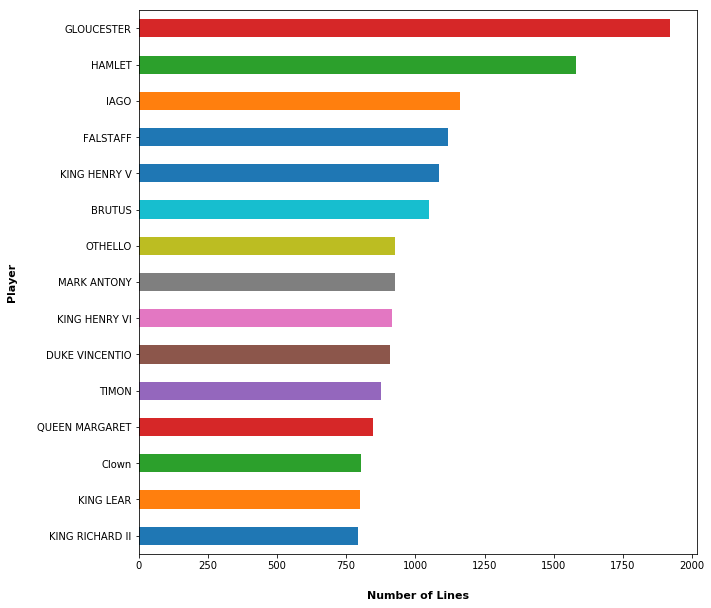

In [4]:
# Determine players that talk the most
chattiestPlayers = shakes_t['Player'].value_counts()
g = chattiestPlayers.sort_values().tail(15).plot(kind='barh', figsize=(10,10), zorder=2)
g.set_xlabel("Number of Lines", labelpad=20, weight='bold', size = 11)
g.set_ylabel("Player", labelpad=20, weight='bold', size = 11)

In [5]:
# I used a label encoder to enumerate all the values seen
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(shakes_t['Player'])
shakes_t['Player'] = le.transform(shakes_t['Player'])

In [6]:
le.fit(shakes_t['ActSceneLine'])
shakes_t['ActSceneLine'] = le.transform(shakes_t['ActSceneLine'])

In [7]:
le.fit(shakes_t['Play'])
shakes_t['Play'] = le.transform(shakes_t['Play'])
shakes_t.head(10)

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,9,1.0,324,457,"So shaken as we are, so wan with care,"
1,9,1.0,435,457,"Find we a time for frighted peace to pant,"
2,9,1.0,546,457,And breathe short-winded accents of new broils
3,9,1.0,657,457,To be commenced in strands afar remote.
4,9,1.0,768,457,No more the thirsty entrance of this soil
5,9,1.0,781,457,Shall daub her lips with her own children's bl...
6,9,1.0,792,457,"Nor more shall trenching war channel her fields,"
7,9,1.0,803,457,Nor bruise her flowerets with the armed hoofs
8,9,1.0,814,457,"Of hostile paces: those opposed eyes,"
9,9,1.0,325,457,"Which, like the meteors of a troubled heaven,"


In future work, the data above could be used as an additional feature for all of the players. Their total number of lines could be added as an additional column in the dataframe. 

Next, I figured that it woukld be good to split the dataset into a training set, testing set, and a validation set.

First, all of the rows in the dataset need to be shuffled in order to ensure an even distribution of plays and players are represented.

Next, I partitioned the dataset into an 80-10-10 split from this randomized set, and saved the corresponding datasets.

In [8]:
# Take random samples from the dataset using 'sample' and preserve
# state with 'random_state'
# Unfortunately, I don't believe that this is a partition.
training = shakes_t.sample(frac=0.8, random_state=1)
testing = shakes_t.sample(frac=0.1, random_state=1)
validation = shakes_t.sample(frac=0.1, random_state=1)

In [9]:
# Refactor dataframes so that the decision, Player, is the final col
training = training[['Play', 'PlayerLinenumber', 'ActSceneLine', 'Player']]
testing = testing[['Play', 'PlayerLinenumber', 'ActSceneLine', 'Player']]
validation = validation[['Play', 'PlayerLinenumber', 'ActSceneLine', 'Player']]

# Save new dataframes
training.to_csv('../data/processed/training.csv', compression='gzip')
testing.to_csv('../data/processed/testing.csv', compression='gzip')
validation.to_csv('../data/processed/validation.csv', compression='gzip')

Next, I wanted to start building out some sort of classification model. I figured that Random Forests would be a good place to start given its high accclaim from some of my colleagues and Martin. 

In [10]:
# Set Up Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier


In [11]:
# Next, establish decision.
D = training['Player']

In [12]:
# Features are every other meaningful column
features = ['Play', 'PlayerLinenumber', 'ActSceneLine']
features

['Play', 'PlayerLinenumber', 'ActSceneLine']

At this point, it is probably best to test out the classifier by training it on the training set. From there, we should be able to predict the player on the training and validation sets.

In [13]:
training = training.drop('Player', 1)
clf = RandomForestClassifier(n_jobs=2, random_state=0)
initialFit = clf.fit(training, D)

In [14]:
# Show feature importance
feats = {} 
for feature, importance in zip(training.columns, clf.feature_importances_):
    feats[feature] = importance 
print(feats)

{'Play': 0.28579579112121783, 'PlayerLinenumber': 0.2278898698048018, 'ActSceneLine': 0.4863143390739804}


In [15]:
testing.head(7)

,Play,PlayerLinenumber,ActSceneLine,Player
93046,29,21.0,7819,43
26646,6,6.0,6913,907
46687,15,4.0,1545,138
54848,18,39.0,14353,664
18689,4,34.0,1306,148
26150,6,81.0,4429,107
70995,22,22.0,9364,156


In [16]:
# Now test it on another partition
from sklearn.metrics import accuracy_score
T = testing['Player']
testing = testing.drop('Player', 1)
predicted = clf.predict(testing)
print(accuracy_score(T, predicted))

0.9778256575994254


Seems pretty good! 

In [17]:
# Some sanity checks since I thought that this model was a little too good to be true
testing.head(10)

,Play,PlayerLinenumber,ActSceneLine
93046,29,21.0,7819
26646,6,6.0,6913
46687,15,4.0,1545
54848,18,39.0,14353
18689,4,34.0,1306
26150,6,81.0,4429
70995,22,22.0,9364
31627,7,3.0,14955
25415,6,20.0,3267
10373,13,3.0,3698


In [18]:
T

93046      43
26646     907
46687     138
54848     664
18689     148
26150     107
70995     156
31627     658
25415     107
10373     162
10853     700
95094     846
43352     186
13348     454
1289      663
5387      835
17114     707
56700      70
52832      91
34829     455
20625     550
103078    547
774       267
25414     558
84206     692
51917     247
92619     125
32939     481
33586     906
99465     625
         ... 
90066      90
27179     171
89127     512
57162     533
34        912
56918     533
94827     728
82861     587
46030     717
47041     107
11251     692
40993     108
98850     850
41665     691
60554     237
381       418
61326     237
14026     628
81090     227
57683     536
82507     361
31105     375
74311     140
86164     445
103269    193
60670     237
43430     177
38548     458
30845     430
40643     186
Name: Player, Length: 11139, dtype: int64

In [19]:
# Finally, look at validation set in the same way.
V = validation['Player']
validation = validation.drop('Player', 1)
predictedV = clf.predict(validation)
print(accuracy_score(V, predictedV))

0.9778256575994254
